# Assignment 3: Optimization Part 2


University of California Berkeley

ME C231A, EE C220B, Experiential Advanced Control I

**Released:** 9/26/2023

**Due on Gradescope:** 10/8/2023 at 11:59pm

**Submission Instructions:**


*   Make a copy of this colab notebook in your drive. (File -> Save a copy in Drive)
*   Complete your homework by writing code in your copy of the notebook and writing answers to the written questions.
* When you are ready to submit, run all your cells so the outputs show in this notebook.
* Save your colab notebook as a PDF. (File -> Print -> Save as PDF).
* If required, combine the colab PDF with a PDF of any written answers.
* Submit two files on **Gradescope**:
  * PDF of Colab answers and written answers
  * Python notebook of Colab (File -> Download -> Download .ipynb)

***

These notes were developed by Fionna Kopp, Charlott Vallon, Roya Firoozi and Francesco Borrelli at UC Berkeley. They are protected by U.S. copyright law and by University policy (https://copyright.universityofcalifornia.edu/resources/ownership-course-materials.html).

If you are enrolled in ME C231A/EE C220B you may take notes and make copies of course materials for your own use. You may also share those materials with another student who is registered and enrolled in this course, and with DSP.

You may not reproduce, distribute or display lecture notes or recordings or course materials in any other way — whether or not a fee is charged — without my express written consent. You also may not allow others to do so. If you do so, you may be subject to student conduct proceedings under the Berkeley Code of Student Conduct, including Sections 102.23 and 102.25.

***

In [1]:
# Install required dependencies
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !pip install -q pyomo
  !apt-get install -y -qq glpk-utils
  !apt-get install -y -qq coinor-cbc
  !wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip"
  !unzip -o -q ipopt-linux64

^C
unzip:  cannot find or open ipopt-linux64, ipopt-linux64.zip or ipopt-linux64.ZIP.


Note: You should now be familiar with $\texttt{cvxopt}$ to solve linear and quadratic programs. For certain problems in this assignment you will need to use a nonlinear solver. You may specify $\texttt{IPOPT}$ as a solver in $\texttt{pyomo}$ which solves constrained, nonlinear programs.

***

In [2]:
import pyomo.environ as pyo
import numpy as np

def check_solver_status(model, results):
    from pyomo.opt import SolverStatus, TerminationCondition
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        print('========================================================================================')
        print('================ Problem is feasible and the optimal solution is found ==================')
        print('z1 optimal=', pyo.value(model.z[0]))
        print('z2 optimal=', pyo.value(model.z[1]))
        print('optimal value=', pyo.value(model.Obj))
        print('========================================================================================')
        bound = True
        feas = True
        zOpt = np.array([pyo.value(model.z[0]), pyo.value(model.z[1])])
        JOpt = pyo.value(model.Obj)
    elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('========================================================')
        print('================ Problem is infeasible ==================')
        print('========================================================')
        feas = False
        zOpt = []
        JOpt = []
        if (results.solver.termination_condition == TerminationCondition.unbounded):
            print('================ Problem is unbounded ==================')
            bound = False
        else:
            bound = True

    else:
        if (results.solver.termination_condition == TerminationCondition.unbounded):
            print('================ Problem is unbounded ==================')
            bound = False
            feas = True
            zOpt = []
            JOpt = np.inf
        else:
            bound = True
            feas = True
            zOpt = []
            JOpt = np.inf

    return feas, bound, zOpt, JOpt

# <font color=blue> 1. Linear and Quadratic Programming: </font>

The following problems include some of the examples from Homework 2. This time, use $\texttt{Pyomo}$ to solve them. Please submit your solutions as individual functions for each of the 4 parts.

These functions should have no inputs and 4 outputs. The first two outputs are logical values indicating the feasibility and  boundedness, where a [1,1] stands for a feasible problem and bounded solution. The third output is the value of the optimizer, which should be an $N\times 1$ vector, where $N$ is the dimension of decision variable. If the problem is infeasible or unbounded, the function should return an empty array here (i.e. $\texttt{zOpt = []}$). The fourth output is the optimal value of the cost function. If the problem is infeasible, the function should return an empty array here. If the problem is unbounded return $\texttt{+inf}$ or $\texttt{-inf}$ here. You can call the function $\texttt{check_solver_status}$ to determine if the problem is feasible/bounded or not.  

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ &  -5z_1 -7z_2  \nonumber\\
\text{s.t. } & -3z_1 +2z_2 \leq 30  \nonumber\\
& -2z_1 + z_2 \leq 12  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber
\end{align}

Write a function $\texttt{LPQPa}$, with function declaration line

`def LPQPa():
    return feas, bound, zOpt, JOpt`


then call the function and print the outputs.

### <font color=red> Deliverable 1a (5pts): write your answer in the code cell below.</font>

In [3]:
from posixpath import join
from pyomo.opt import SolverStatus, TerminationCondition
import pyomo.environ as pyo

#Please use the following definition of the decision variables. Otherwise, check_solver_status will not work.
model = pyo.ConcreteModel()
model.z = pyo.Var([0,1]) # This creates a decision variable vector z with index 0 and 1. You can call model.z[0] and model.z[1]

# Write your code here:
def LPQPa():

  model.Obj = pyo.Objective(expr = -5*model.z[0] -7*model.z[1])
  model.Constraint1 = pyo.Constraint(expr = -3*model.z[0] + 2*model.z[1] <= 30)
  model.Constraint2 = pyo.Constraint(expr = -2*model.z[0] + model.z[1] <= 12)
  model.Constraint3 = pyo.Constraint(expr = model.z[0] >= 0)
  model.Constraint4 = pyo.Constraint(expr = model.z[1] >= 0)

  solver = pyo.SolverFactory('cbc')
  results = solver.solve(model)

  feas, bound, zOpt, JOpt = check_solver_status(model, results)
  return feas, bound, zOpt, JOpt

feas, bound, zOpt, JOpt = LPQPa()
print("feas: {feas}".format(feas=feas))
print("bound: {bound}".format(bound=bound))
print("zOpt: {zOpt}".format(zOpt=zOpt))
print("JOpt: {JOpt}".format(JOpt=JOpt))

  - termination condition: unbounded
  - message from solver: <undefined>


================ Problem is unbounded ==================
feas: True
bound: False
zOpt: []
JOpt: inf


$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & 3z_1 + z_2  \\
\text{s.t. } & z_1 - z_2 \leq 1  \\
& 3z_1 + 2z_2 \leq 12  \\
& 2z_1 + 3z_2 \leq 3  \\
& -2z_1 +3z_2 \geq 9  \\
& z_1 \geq 0  \\
& z_2 \geq 0
\end{align}

Write a function $\texttt{LPQPb}$, with function declaration line

`def LPQPb():
    return feas, bound, zOpt, JOpt`

then call the function and print the outputs.

### <font color=red> Deliverable 1b (5pts): write your answer in the code cell below.</font>

In [4]:
#Please use the following definition of the decision variables. Otherwise, check_solver_status will not work.
model = pyo.ConcreteModel()
model.z = pyo.Var([0,1]) #This creates a decision variable vector z with index 0 and 1. You can call model.z[0] and model.z[1]

# Write your code here:
def LPQPb():

  model.Obj = pyo.Objective(expr = 3*model.z[0] + model.z[1])
  model.Constraint1 = pyo.Constraint(expr = model.z[0] - model.z[1] <= 1)
  model.Constraint2 = pyo.Constraint(expr = 3*model.z[0] + 2*model.z[1] <= 12)
  model.Constraint3 = pyo.Constraint(expr = 2*model.z[0] + 3*model.z[1] <= 3)
  model.Constraint4 = pyo.Constraint(expr = -2*model.z[0] + 3*model.z[1] >= 9)
  model.Constraint5 = pyo.Constraint(expr = model.z[0] >= 0)
  model.Constraint6 = pyo.Constraint(expr = model.z[1] >= 0)

  solver = pyo.SolverFactory('cbc')
  results = solver.solve(model)

  feas, bound, zOpt, JOpt = check_solver_status(model, results)
  return feas, bound, zOpt, JOpt

feas, bound, zOpt, JOpt = LPQPb()
print("feas: {feas}".format(feas=feas))
print("bound: {bound}".format(bound=bound))
print("zOpt: {zOpt}".format(zOpt=zOpt))
print("JOpt: {JOpt}".format(JOpt=JOpt))

  - termination condition: infeasible
  - message from solver: <undefined>


================ Problem is infeasible ==================
feas: False
bound: True
zOpt: []
JOpt: []


$\textbf{Part (c)}$

\begin{align}
\min \hspace{2mm}&  \| \begin{bmatrix}
z_1             \\[0.3em]
z_2 +5            \\[0.3em]
\end{bmatrix}\|_1 + \|\begin{bmatrix}
z_1-2             \\[0.3em]
z_2             \\[0.3em]
\end{bmatrix}\|_\infty
\nonumber\\
\text{subject to} \hspace{12mm}& 3z_1+2z_2 \leq -3 \nonumber\\
&\hspace{6mm} 0 \leq z_1 \leq 2 \nonumber\\
&\hspace{2mm}-2 \leq z_2 \leq 3 \nonumber
\end{align}

Note: Use the LP reformulation of this problem.

Write a function $\texttt{LPQPc}$, with the following function declaration line, then call the function and print the outputs.

`def LPQPc():
    return feas, bound, zOpt, JOpt`

### <font color=red> Deliverable 1c (10 pts): write your answer in the code cell below.</font>

In [5]:
#Please use the following definition of the decision variables. Otherwise, check_solver_status will not work.
model = pyo.ConcreteModel()
model.z = pyo.Var([0,1]) # This creates a decision variable vector z with index 0 and 1. You can call model.z[0] and model.z[1]

# Write your code here:

model.t = pyo.Var([0,1,2])

def LPQPc():

  model.Obj = pyo.Objective(expr = model.t[0] + model.t[1] + model.t[2])
  model.Constraint1 = pyo.Constraint(expr = model.z[0] - model.t[0] <= 0)
  model.Constraint2 = pyo.Constraint(expr = -model.z[0] - model.t[0] <= 0)
  model.Constraint3 = pyo.Constraint(expr = model.z[1] + 5 - model.t[1] <= 0)
  model.Constraint4 = pyo.Constraint(expr = -model.z[1] - 5 - model.t[1] <= 0)

  model.Constraint5 = pyo.Constraint(expr = model.z[0] - 2 - model.t[2] <= 0)
  model.Constraint6 = pyo.Constraint(expr = -model.z[0] + 2 - model.t[2] <= 0)
  model.Constraint7 = pyo.Constraint(expr = model.z[1] - model.t[2] <= 0)
  model.Constraint8 = pyo.Constraint(expr = -model.z[1] - model.t[2] <= 0)

  model.Constraint9 = pyo.Constraint(expr = 3*model.z[0] + 2*model.z[1] <= -3)
  model.Constraint10 = pyo.Constraint(expr = model.z[0] >= 0)
  model.Constraint11 = pyo.Constraint(expr = model.z[0] <= 2)
  model.Constraint12 = pyo.Constraint(expr = model.z[1] >= -2)
  model.Constraint13 = pyo.Constraint(expr = model.z[1] <= 3)

  solver = pyo.SolverFactory('cbc')
  results = solver.solve(model)

  feas, bound, zOpt, JOpt = check_solver_status(model, results)
  return feas, bound, zOpt, JOpt

feas, bound, zOpt, JOpt = LPQPc()
print("feas: {feas}".format(feas=feas))
print("bound: {bound}".format(bound=bound))
print("zOpt: {zOpt}".format(zOpt=zOpt))
print("JOpt: {JOpt}".format(JOpt=JOpt))

================ Problem is feasible and the optimal solution is found ==================
z1 optimal= 0.0
z2 optimal= -2.0
optimal value= 5.0
feas: True
bound: True
zOpt: [ 0. -2.]
JOpt: 5.0


$\textbf{Part (d)}$

\begin{align}
\min_{z_1,z_2}~ & z_1^2 + z_2^2 \\
\text{s.t. } & z_1 \leq -3 \\
& z_2 \leq 4\\
& 0 \geq 4z_1+3z_2  
\end{align}

Write a function $\texttt{LPQPd}$, with the following function declaration line, then call the function and print the outputs.

`def LPQPd():
    return feas, bound, zOpt, JOpt`

### <font color=red> Deliverable 1d (5 pts): write your answer in the code cell below.</font>

In [6]:
#Please use the following definition of the decision variables. Otherwise, check_solver_status will not work.
model = pyo.ConcreteModel()
model.z = pyo.Var([0,1]) #This creates a decision variable vector z with index 0 and 1. You can call model.z[0] and model.z[1]

# Write your code here:
def LPQPd():

  model.Obj = pyo.Objective(expr = model.z[0]**2 + model.z[1]**2)
  model.Constraint1 = pyo.Constraint(expr = model.z[0] <= -3)
  model.Constraint2 = pyo.Constraint(expr = model.z[1] <= 4)
  model.Constraint3 = pyo.Constraint(expr = 4*model.z[0] + 3*model.z[1] <= 0)

  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)

  feas, bound, zOpt, JOpt = check_solver_status(model, results)
  return feas, bound, zOpt, JOpt

feas, bound, zOpt, JOpt = LPQPd()
print("feas: {feas}".format(feas=feas))
print("bound: {bound}".format(bound=bound))
print("zOpt: {zOpt}".format(zOpt=zOpt))
print("JOpt: {JOpt}".format(JOpt=JOpt))

================ Problem is feasible and the optimal solution is found ==================
z1 optimal= -2.9999999704176505
z2 optimal= -6.265025272784229e-10
optimal value= 8.999999822505904
feas: True
bound: True
zOpt: [-2.99999997e+00 -6.26502527e-10]
JOpt: 8.999999822505904


***

# <font color=blue> 2. System Identification of a Building Zone Temperature Model: </font>

In Homework 1, you computed a discrete time model of a building zone temperature that looks like the following equation:

\begin{align}
T(k+1) = ( 1 - p_1 u_1(k) )T(k)  + p_2 u_1(k)u_2(k) + q(k). \nonumber
\end{align}

Now, $p_1$ and $p_2$ are parameters of the model that we want to identify using a least-squares approach. To determine the parameters $p_1$ and $p_2$, we use data from a weekend and assume that the heat load $q(k)$ is zero.

In the accompanying $\texttt{etch2169.mat}$ file, you have data for the following measurements of the state and inputs on a particular day (The downloaded data contains the day's measurements from between 10 AM and 4 PM.):

1. zone temperature $T$ in array $\texttt{RoomTempData}$
2. air mass flow rate $u_1$ in array $\texttt{FanData}$
3. supply air temperature $u_2$ in array $\texttt{SupplyTempData}$

A number of data pre-processing steps have been completed for you below.

In [7]:
#@title # Run this cell to generate `etch2169.mat`
#@markdown *DO NOT MODIFY THIS CELL*

data = b"""
TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IE1BQ0k2NCwgQ3JlYXRlZCBvbjogVHVlIFNl
cCAxMSAyMjo0NjowMCAyMDE4ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAAAAAAAAAAAAABSU0PAAAA6wcAAHicvZZ5cBRVHscbkCMygFxZQI4QZAAxBBjCESB0JzHMTIIR
IiqewaKi67peAVnLtRbPpdzout4ptMAr3pYa74vgUV5ZlmIVCYIILOFQDkkIIUDY3+/b38fMa7H8
Q8upoj68me73Xn/6299OV8dx3kx1nA7CTo5P/bTn+LI2jtNWKHA6yr+CuVfmz50/10mR/y+S85an
3v2Vuyjs9XxoB5iWXrBGuWrYo+Apz7SAYyLnfK3cNPEV8J6cLmuVSz/9I/jAxyvAgi/61ylLZl8P
lm78Cny1NHOdcl7ZHeCb27aAH1/jfqNcfehh8OY2zeCam2euV96++Hnw3h4pG5T5feaBD1a+B0aX
9vlW2fxEOfj0syvB18aN3Kh8Ycwt4IUTvgUvX5H9nbLfJ/eDX9TuBQeeEd+k/E/Jk+D6DW02K7df
ehH43bzXwbsv775F+Ujjn8EZLZ+C59069H/KF9v/DWz797Vgt+5ZW5XiGbyq//fgh4/k1yvnP74U
3PDykXp63qa87dWXttHzdmVu/mXgvtiH4OPFA3coD6xaCLY7/8sd9LxTuWLnP8BeV2zdSc/fK/s2
VILhG5vAsR1LflCeesJz4LqUDruU2+69BGwcsHwXPe9WLkm7FiwK/xuc89KIPcqU128FU91Ne+h5
Lz3vpWfwhtWFPypHrq0CJ17Sbp+yYssF4JQdb4C7dvdooOcGem6g50Z6Bi/qvK6RnvfT8356Bv9a
Nb2JnpuY5yZ6PsA8H6DnZnpupudmej7IPB9kng/Scwvz3ELP4OAm75BywcIl4GfNjYeY58PM82Hm
+Qg9H2Gej9Bzq3L2iAWtzHMrPR9lnsHyjzYfpWfHEy4sfBAUz6B4buP5nkHJc1tl5sXng5JnMFbe
q53newbFM9h6dMgJylk33Qi+889vwD/dP76953sGxTMovdFBKb0B3pRxGBTPHT0/z+DuD7p2Ukpv
gOIZlN5I8XzPoOQZFM8nen6eQekNUPLc2fM9g9IboHgOeX6ewQl3deyilN4AxTMonrsqpTdA8QyK
526en2fwrXc2guL5JM/PMzhs5j5QeqO7UnqjOz338Pw8g5JnUPLcU9nyl6t60nNPeu7l+XnuRc/g
KxWR3sr+S/7Vm55B6Y1Uz89zKj2Dd75x7h88P89g1tud+3h+nvvQMyh57kvP4FNrVoPnrM/oR8/g
yvnb+9HzyfQMSm+cTM/9PT/PoPTGAM/P8wB6HkDPA+kZbJ+5aiA9D1KWZd8OSm8Mouc05fu596Ux
z2nM82DmeTA9p9NzOj2n0/MQegZ/XPAJ+OgN6afQMyi9AUpvDGWeQXkPDmWew8qM5x8DpTfCzPMw
Zc571aD0xnDmeTg9D2eeR9AzKL0xgnk+VSm9AV6ztx6U3hiplPcgKL0BXt9afJpyS+jF05jnDHrO
oOcMeh6lfPmF60Yxz6PoOZOeM5nnTHoerZTeGE3Po5nnMcrFFzwNSj+PpWdQemMsPUeU0hsR5jnC
PI+j53H0PI6es5jnLHrOoufxSukNUN6D4+l5Aj1PoOeJzPNEegaP/nfQJKW8B0HpjUn0nM08g9LP
2czzZOZ5MvM8mXmeopTemELPU+kZlPcg+MSQfjnMcw4959DzNKX0xjR6Bod8PtVVSm+49Ax+ffYM
Tym94THPufScyzzn0nOe0r36ijzmOY+e8+k5n57z6fl05hmU3gDlPVjAPIPSGwX0PJ2ep9NzVLl1
eRlYvPKjKD3HmOcY8xyj57iy0+bFcXqOM8+F9FxIz4X0XKSU3iii5xnKO7rNBSf3fncG83wGPYPS
G+DhkcOL6bmYnouZ5zOV0hvgldE9oPTGTKX0xkzmeRY9z2KeZ9FziVJ6o4R5BqU3zqJnUPoZlPfg
bKX8Ge1GIoWucFnlHFD+sLbGNbUhsggsLSsjw6AbqbaOW1ZZeVya881xpWX1cf/88sJkyhHx5N/N
OvLh+bVxe1/+WNaxzgseZ36XffD4ujiv1zrerJOYL8x1KqzjDcVHgGH+7prriifTrLussq91nnzM
efx9jrWv0rIq63dzHWZe8705LrFutbUvGceS10/M0xCz5w/F7eNC1nGyP3O8NZZ1yLIY90FGrN+D
x5uxeOe8NWafHC/iuC5GL7Hk/cj88eTzEtdZZ80r+bDWM/sz68h8Uc4fpc8o14/yPP5edNxxghVR
zm/NF/xe9sVxdfR468v+o8me5GP5lfvyM57ssaFcf9SeJzhvPfcRsXwYD7KutU+zb3Pd5neZl9+H
zPVMT6bsh+MKjp1Jv4ay70nct8t95Pnj8oLkdWRs7UPO4/pu1KZjUeYN3L/qQD5c63oTnsoDx9db
9zXx/PS17oPxb44z+TXHGQbvnzk+mCPnp/fXouz3N7kPv0TJSTa9uP73NXncdwHHvC/hwP5rAr5r
LJ+J5yX4HIf4nBRZvWF6wowTveMedyz33ZrHPE9J81o+ZR/mPv8uXg0lZ1O5bh73z/wXmX1YOTX5
TOS3wspv4rpMD4St3CWef9OX4eD5vJ9V1n01fn7pemQeM3Z5Xfk+5zAvdo8Y38GeNXkxfesce17s
584JPH8mP8FeTOQuZPJk5THx/JveKAr2yu+SB+fYc1c71R+7udwXc1Fb4Huos/IR9JZ47kyPVFm9
Zo4LvueC3s335r3pHMtj7W/ynMg67Jdq9ot7evJ1So6ZE5O/RYH3e12gN0JWHqxe+T+wKJkoDwAA
AJUGAAB4nK2WC0xVdRzHDxr4IlJBfCAv5a0ScBF5iNwjIiIiz5yZGWpiZgw1K2fOMcuszDnnrCh1
zJw5tZxjzpw9yJw5R5kxNfL9QkVFFEWuiPT7/c73zu6Bw72obHefncu599z/53zu73/dFEUp91QU
F2JXRSP/OeP4DSdF6UQkKK70yCkqKsybVThvzPSF0/m8bvQoptdv+2TlMXNxkNrc/bKw+zr1OHPf
V+uFbgMbhF5bck4wK7Z/J1yyq+s/zKF7ZgqLY38SRo7qV8VMPLRQOD7nqHBjZdi/zDt5Hwo3TTkr
3Hkp4SQzv+Zz4VsL64Xl9yacYs5v+lbo79T5NPOoyzRh4Md7hFG9Pc4wL/QtEq71PixMHhx4lvnF
5qXC1G1VwrzomHNM5/g1wt1JN4Tdfk05z9x7sFR4MKtZ+O6kyReYh0/sEvq83OMic8XsOcLYwgPC
qwt8LzFH3l0kvGGpFFo+iLjMJM+X4Vn4fU9zNXOa59fCuaX3q+H5CrMoeIfwt63OV+FZePrHn4Wr
9ve/xjyf/Law9o8j1+C5hrn91RXCljPnauD5OrNzwTphz7rbQu/FE28wPd7bIjywxOkmPAuXue69
Cc+1zI/WFgpjSg7VwvMtZn1IsXBz+Mlb8FwHz3XwLJyVknqb6Zm+6TY8Cwf8PekOM3hqmfDEdLd6
5pCLs+vhuR6e7zK/XLRYmLb0mHBDS/g9eBZOWV19Dz03wHMDPDfA8330fB89NzL/iprRCM+N8GxB
zxZ4tsDzA/T8AJ4fwHMTem6C5yb0/BA9P0TPzfDcjJ6b4fkRen6Enh/Bcwt6Fiplp1rgWVE1z8LJ
+2qE5NlJ1TwLybOQPHdStZ6F5LmzqvUsJM9C8vycqvUsJM9C6tlZ1TwLqWch9ezCpLkhJM/CX/yz
u6haz0Ly3FXVehaSZyHNjW6q1rOQPAvJc3dmZtVyIc0NIXnuoWqeheRZSJ5dVa1nIfX8PDN85WtC
6ll4fFVvN1XzLCTPQvL8gqr1LKSehY07o3vCs5B6FtLc6MWkudELnoU0N3qrWs/C90+7usOzOzy7
w7OHqvXsAc9C6rkPPAup5z7w7KlqPQtpPgup576q1rPQd1iXfqrWcz94FlLP/VWtZ+GatD+FozND
BzBpbgipZ2FufrwXPHvBsxc8D1S1ngfCszfznWVTveFZSD37wLMPPPvAsy88+8KzLzz7MbfuXu0H
z37o2R89C+dUNPnD8yB4HoSeBzMvXX9TePLqfuFntd4B8BwAzwHoORCeA9GzkOZGEHoOgmfhjA2Z
wfAcjJ5D0LOQ9sEQ9BwKz6HoORQ9h6HnMHgOQ89D4FlYNrdO+Pr89KHwLKS5MYxJc0NIc2MYPIcz
k9bPC4fncHh+EZ6FtA8KaW5EoGchzY0I9BzJXHDkm0j0HAnPUUyaG1HwbELPJvRsQs/R8BwNz9Hw
PByeh8PzcHiOgWfh7wGWGPQ8Ap5HwHMsPMei51j0HMekuREHz3HwHA/P8fAcD88J8JyAnhPQ80gm
zY2R8JwIz4noORGeRzFpHxTSPjgKnpPgOQk9J8GzGZ7N6NmMnlUmzQ0VnlV4Ho2eR8NzMpP2wWT0
nAzPY+BZSL83hDQ3UpgZzp8KaW6kwPNYJs2Nseh5LDynMkMidqbC8zgmzY1x8DwOntPQcxo8p8Hz
eCbtg8JXZl4Qus5JTIfndHhOh+cJ6HkCPGcwaW5koOcMeJ7IpLkxET0Lr2wcnMmkfTATnoW7fhiR
Bc9Z6DkLnrOZNDey4TkbnnPQcw485zJpbuSiZyHNjTx4zkPPeej5JSb9jC4t2Ztj/h/ph7kwv+Bg
h2g2leF4i82x9X2tx/rn7V3PbKrE+VU2x/rn9a8zen/rcXlFhQ3176enopxrl/rz7a3HaF1G180v
qHaIZlN9u2x9XqWBlx1t3k8rje7bs1qH/nOWllgcIv3ltkXr/1t7qGyzD/369OvS3/+nXYfR584v
cHGI5RWuNsdmk/tTsbSkf7vUX1/vtaN96j04um79evUe9P/Xr0NR/NpkfkFQm8f2aDaZbKh/vrxi
aJvnWVlaEucQW7/O9r5YfVq9W7/X9uaN/j4pDvZorx97njvKp/VHr3DovMfXddF5sJ0f+jnSej+q
avf70FG/es9Gfh31beSzdcfubfrQ92alve/1k3bjaD/21vWk37vH88F2/db9QP+7Qk/9vmG0HxjN
+Y52oPfyrOaaldbrG81ho/XZW7fReo3W/azniVEncvwf+ea6qQ8AAAC/BwAAeJytlglQVVUYx68b
oREuKEpkoiIiIqKAiIi8K4IIyHssWlQWjiNmqZGa49IY5ag56lhZjpjj0KZjjplhpeU4jGO04ThG
argQuaDiSk9EVvvOd//H67k8xpzxzTA/7naW3/mf715PTdOKvDXNjeiuGRS/Djh+uY2mtSUSNE/6
y3gjN3fWoszps3PHTZ0/VdM60rk88bzn2mO2vAD9uXWVzBk+cccFe/bZwny1oJa5MCjzhGBg6C5m
WUSnvwRXRU9nntl/gLn2oE+Z4KaUBcxtx/9gNjwTfFJwx5SVzLvlFUyPmTGnBPfP2cicNd/J7L04
9bTg4be2M5cub39GMGT1S8x3PPYx123oUS4YuzmXeeOT35mNgwP/FnQG5jE/DznFzAwfUSE49cAH
zK6HrjGnx4//R9A7+VNm/2PNzNKTWWcFB75QyFxyxuOc4PkrrzA/rP6JGV/rd16wpnEJc8LSY8zJ
7sMvCJLnC/DM7PSRXin446bNzJ/96yrh+aJgyY6dzDd3u1+CZ2aUXsSsSvC9LBjzy3xmUvrRy/Bc
Jeh+9l3m89POVsHzFcHsqg1X4Jm5qNl+VfD1hm3Mvm3aXYNnZvl7P1yD5+uCZ3u+xlzf+zdmXP8B
NwQdO99maoWnmbv3Rt6E55vwzDz4a2K14Nwjn1XDczU8/yu4rGIPM7yysxOemSNnH3LC8y14vgXP
t+C5Bp6Z33ldqkGeb8PzbeT5NjzXIs+1yPMdweDvp92B5zvwXIc818FzHTzXC9rLltfDcz08NyDP
zC43qxuQ50bkuRF5boLnJuS5CZ6bkedm5JlZsC3gLvLMnBJZfheeNd3wzPw29iqT8txGNzwzyTNz
weRn2+pGnpnkuZ1ueGZSnpmX5vZpL7hx4WLmF21PMMlzB93wzKQ8M8mzmyDVDSblmem7Nf0x3cgz
kzy760aemeSZSXWjo27kmUmemeS5kyDVDSbVDSZ5flw3PDMpz0zy7KEbeWaS5yd0wzOT8swc3q27
p254ZlKemeS5s27kmUl5ZlLd6ALPzDmJN7rAc1fBfcUFzGJHE5Py3E038twNnr3g2QuemZTn7vDc
HZ6ZdctCe8Azk/LMpLrhrRt59oZn5p9fTeqpG3lmUt3opRt57gXPTMqzj27kmXn98BHmltKgJwWp
bjD3XjzH3HU+2heemZRnX3h+SjfyzKS60VvwqNuLTMozk/L8NDwzKc9Pw3MfeO4Dz0zKs59gh1Hv
M6luMKlu9EWe+yLPfeG5H/LcD577wzOT6kZ/5NlfkOqGPzz7I88D4HkA8jwAeQ5AnplUNwKQ54Hw
PBB5DkSeA+E5EHkeBM+DkOdByHMQ8sykuhGEPA8W9HHmD4ZnZlFNSjA8ByPPQ5DnIcjzEHgOEfzY
b24IPIfA81B4HgrPQ+E5FHlmUt0IRZ6HwfMweB4Gz8PheTg8h8FzGPIchjyHw3M4PIfDcwQ8R8Bz
BDyPgGem//Z6JtXnSHiOhOeR8DwSnkciz1GCVDei4DkKnkfB8yh4HgXP0cgzk+pGNPI8WpDqxmh4
joHnGHiOgecxgvQeZFLdGAPPsfAcC8+x8GyDZxvybEOedUH63tDhWYfnsYJUN8bCc5zgyhkz45Dn
OHgeB8/j4JlJdSNe8MtVq5lUN+LhOUGQ6kYC8pwAz+MFl+/5ejw8JwpS3UiE50R4noA8T4DnCfCc
JEjvwSR4ToLnZHhORp6TkecU5DkFnicKUt1gUt2YCM+pglQ3UpFnJn1v2AXpPWiHZzs8OwSpbjiQ
Zwc8pyHPafCcBs/pyHM6PGcI2nJnZSDPTKobmfCcCc/Mb9aETeL+NS07JyHNRizIz2LSGTBPOV+Q
H+Ww8f2VqYJFJWsUZudsZdrCnPLYbhyHOQyudxjtVjiM9nzSbPf1n52TA65Af/lpeA7ni9FOod1o
R7Mb/ZekGveXYTwp8jr6yZLPgU7MIwDtZ6C/RZb+tuL8PpwvBL0UH+TJrvabp/RP88N9BdIfjv2U
+dvC5rnsn1pWfEhPcp3kuFveX6asozkOwxu1l3o/5frJ66Znm8vxS39mbvIs61Yo1w3HpbivAucr
cd6J5+qU6+bzK5R50n9Ku7Kd7By39Ptp5ssN47cpudHu5ScF83XCi5oXGhcY5TKnrXm3zo9+yvgo
R3Kc6cZ1P1wPsNxXqszXXFdNed76nBxPyzy7fp72KZ6zoZ0EHN9bL+lR5kDuP/jzgrcMXN/qMi8y
t9KfNSct51lhWefWcuPar9UrraMyPxovzmfh/myFsh0zx4UuPZr+1XbleXMc6rrK+mLOW87HT1kP
OT7Zr6yntN9knbWjP+WY6jPy7od1WKHUYbku1lzLfSbnK/NkXZ+HzbnpyfV6SO80HoUyn+Z9NqUf
k5Uu89JaflruNyf8FCl1Qr73tHv100fxS+0ofmXuadxKnZR1/kGeW6uXD5v3lvs52+J1HtZhkbIe
dEXuV2W/y7zJfS/nTfUfeSxzmavW6racj3UdH1QfrbmR+0POyzyW7RZbciz791E8WeuAuV4Bynuk
qMRDyYG57+Yp9ZC8uvQivztMP+r70/r98aj2XVFJsDJfWacenIs6mUv5HYH55MjvBOV9KvNh/X6Q
71Pzu2/FI53n/82JOd+AdLX9Ckt/ah02vVE9+g9Dyq4G
"""

import base64
data = base64.b64decode(data)
with open('etch2169.mat', 'wb') as f:
  f.write(data)
del data
!md5sum etch2169.mat

4ac0be8f8c1e9c7e543a0329f84b5953  etch2169.mat


For each of the arrays, the first column represents the actual date and time that the measurement (in the second column) is taken. (*Note that we technically only have access to fan speed data as opposed to air mass flow rate data.  Assuming that they are equal (up to a constant) is an approximation which does not hold in general, but is okay for our purposes.)* The dates and times that are stored in the first column of each array mentioned above are in the format of $\textit{serial date numbers}$. Serial date numbers represent a calendar date as the number of days that have passed since a fixed base date of January 1, 0000 A.D.. Note that the measurements were not taken at the exact same times; they are each off by a few seconds from another.

In [8]:
from scipy.io import loadmat
import numpy as np

Data = loadmat('etch2169.mat')
RoomTempData = Data['RoomTempData']
FanData = Data['FanData']
SupplyTempData = Data['SupplyTempData']

#print the first data point  just to understand the data type
time_room_temp = RoomTempData[0,0]
time_fan  = FanData[0,0]
time_sup_temp = SupplyTempData[0,0]

print(time_room_temp)
print(time_fan)
print(time_sup_temp)
print(RoomTempData[0,1])
print(FanData[0,1])
print(SupplyTempData[0,1])

737312.4170802135
737312.4171149357
737312.4170917876
74.9000015258789
54.400001525878906
69.0999984741211


In [9]:
from datetime import date
from datetime import datetime as dt

def datenum(d):
    return 366 + d.toordinal() + (d - dt.fromordinal(d.toordinal())).total_seconds()/(24*60*60)

d_start = dt.strptime('2018-9-9 10:1','%Y-%m-%d %H:%M')
d_end = dt.strptime('2018-9-9 15:59','%Y-%m-%d %H:%M')
d_start_plus_onemin = dt.strptime('2018-9-9 10:2','%Y-%m-%d %H:%M')

TS = datenum(d_start_plus_onemin) - datenum(d_start)
print(TS)
TimeQuery = np.arange(start=datenum(d_start), stop=datenum(d_end), step=TS)
print(len(TimeQuery))

0.00069444440305233
359


Verify using *np.diff* and *np.histogram* that the data is nearly collected with uniform sample time, but that there is a few percent variability.

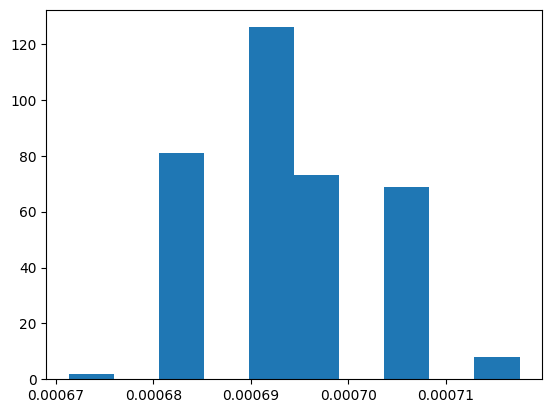

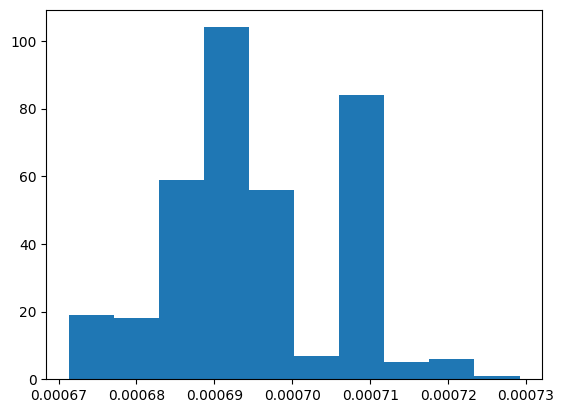

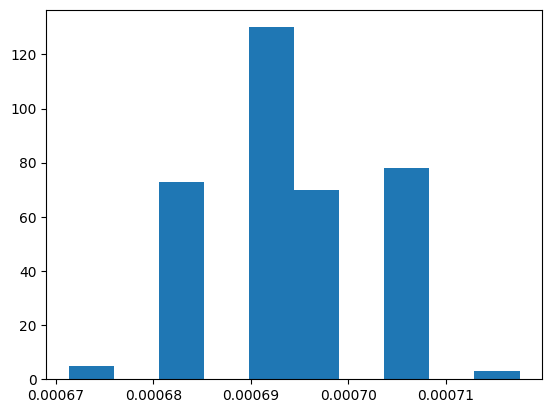

In [10]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(np.diff(RoomTempData[:,0]))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

counts, bins = np.histogram(np.diff(FanData[:,0]))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

counts, bins = np.histogram(np.diff(SupplyTempData[:,0]))
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

Next we are going to interpolate the data points to obtain two effects

1- remove outlies/filter the data,

2- ensure that the new data is sampled exactly every minute (start at 10:01 AM, then 10:02 AM, etc. until 3:59 PM).  

Text(0, 0.5, 'y')

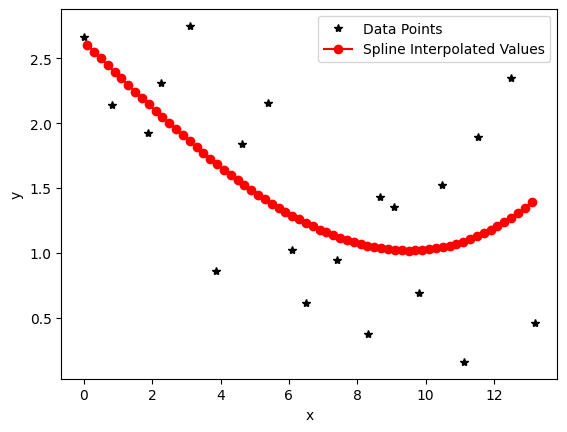

In [11]:
from scipy import interpolate

xData = np.cumsum(np.hstack([np.zeros((1,)), 0.1+np.random.rand(19,)]))
yTmp = np.hstack([np.sort(3*np.random.rand(10,1)), np.fliplr(np.sort(3*np.random.rand(10,1)))])
yData = yTmp.flatten()
xQuery = np.arange(start=0.1, stop=np.max(xData), step=0.2)

f_spline = interpolate.UnivariateSpline(xData, yData)
yInterpSpline = f_spline(xQuery)

plt.plot(xData, yData, 'k*', xQuery, yInterpSpline, '-or')
plt.legend(['Data Points', 'Spline Interpolated Values'])
plt.xlabel('x')
plt.ylabel('y')

Next we plot and compare the spline-interpolated values to the actual data.

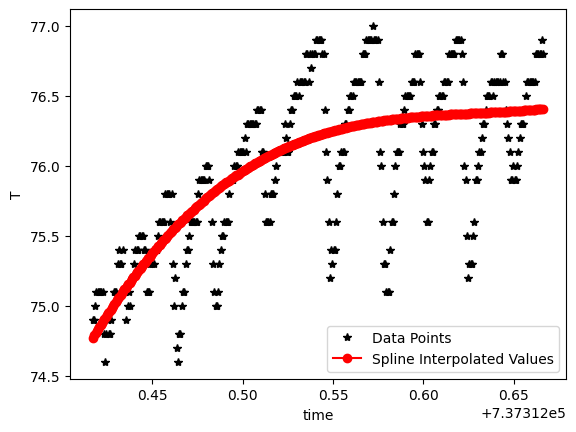

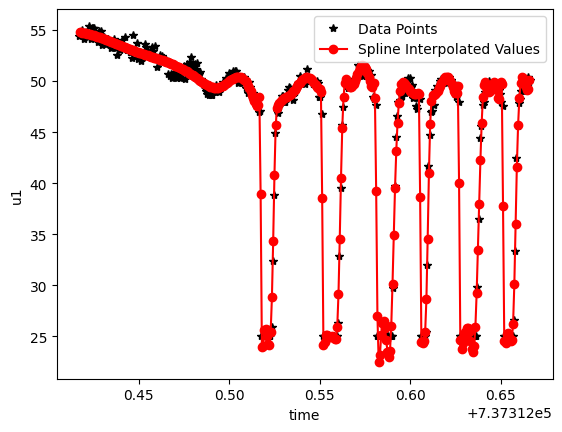

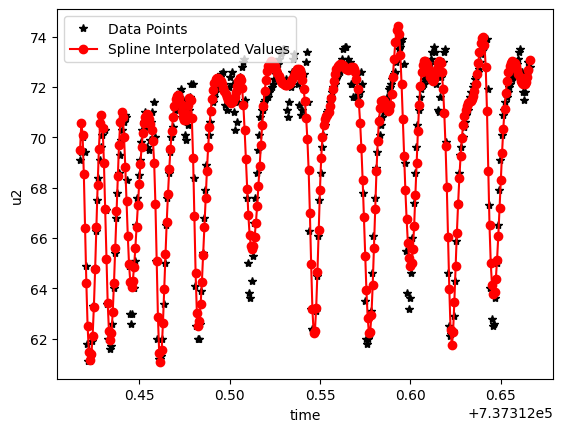

In [12]:
# xData
time_T = RoomTempData[:,0]
time_u1 = FanData[:,0]
time_u2 = SupplyTempData[:,0]

# yData
data_T = RoomTempData[:,1]
data_u1 = FanData[:,1]
data_u2 = SupplyTempData[:,1]

# Spline
InterpSpline_T_mid = interpolate.UnivariateSpline(time_T, data_T)
InterpSpline_T = InterpSpline_T_mid(TimeQuery)

InterpSpline_u1_mid = interpolate.UnivariateSpline(time_u1, data_u1)
InterpSpline_u1 = InterpSpline_u1_mid(TimeQuery)

InterpSpline_u2_mid = interpolate.UnivariateSpline(time_u2, data_u2)
InterpSpline_u2 = InterpSpline_u2_mid(TimeQuery)

# T Plot
plt.plot(time_T, data_T, 'k*')
plt.plot(TimeQuery, InterpSpline_T, '-or')
plt.legend(['Data Points','Spline Interpolated Values'])
plt.xlabel('time')
plt.ylabel('T')
plt.show()
# u1 Plot
plt.plot(time_u1, data_u1, 'k*')
plt.plot(TimeQuery, InterpSpline_u1, '-or')
plt.legend(['Data Points','Spline Interpolated Values'])
plt.xlabel('time')
plt.ylabel('u1')
plt.show()
#u2 Plot
plt.plot(time_u2, data_u2, 'k*')
plt.plot(TimeQuery, InterpSpline_u2, '-or')
plt.legend(['Data Points','Spline Interpolated Values'])
plt.xlabel('time')
plt.ylabel('u2')
plt.show()

You should use the spline interpolated data for the rest of this exercise.

$\textbf{Part (a)}$

To do least squares parameter estimation, we want to solve the following problem:

\begin{align}
\min_{p_1,p_2,e}&\: \sum_{k=0}^{N-1} \|e(k)\|_2^2 \\
\text{s.t. } &T_{data}(k+1) = (1 - p_1 u_1(k))T_{data}(k)  + p_2 u_1(k)u_2(k) + q(k) + e(k), ~~ \forall k = \left\{0,\ldots,N-1\right\}
\end{align}

where N is the number of data samples used, $T_{data}$, $u_1$, and $u_2$ represent the interpolated data, and $e(k)$ is the one step model estimation error of the temperature, whose norm (over time) is minimized by proper
choice of parameters.   Populate the appropriate matrices $A$ and $b$ using the known data such that

\begin{align}
\left[ \begin{array}{c}
e(0) \\ \vdots \\ e(N-1) \end{array} \right] = A p - b
\end{align}

where $A \in \mathbb{R}^{N \times 2},  b\in \mathbb{R}^{N}$ and $p$ is the $2 \times 1$ unknown parameter vector.
Perform the least squares estimation of the parameters using a solver / programming language of your choice. Your answer should be in the form of a function with inputs and outputs as below, where the input arguments $\texttt{u1Seq}$ and $\texttt{u2Seq}$ are of length $N$, while $\texttt{Tdata}$ has length $N+1$.  The code should
formulate and solve the least squares problem, and return the parameter estimate as a $2 \times 1$ vector.
:

`def bldgIdentification(Tdata, u1Seq, u2Seq):
    return estParm`

### <font color=red> Deliverable 2a (15 pts): write your answer in the code cell below.</font>

In [48]:
import cvxpy as cp
import numpy as np

A = np.concatenate([np.array([InterpSpline_u1[k]*InterpSpline_T[k] for k in range(len(TimeQuery)-1)]).reshape(len(TimeQuery)-1, 1),
                    np.array([-InterpSpline_u1[k]*InterpSpline_u2[k] for k in range(len(TimeQuery)-1)]).reshape(len(TimeQuery)-1, 1)],
                    axis=1)
b = np.array([InterpSpline_T[k+1] - InterpSpline_T[k] for k in range(len(TimeQuery)-1)]).T

p = cp.Variable(2)
cost = cp.sum_squares(A @ p + b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(p.value)


The optimal value is 0.005361110756097949
The optimal x is
[-5.27498658e-06 -4.27905528e-06]


In [50]:
# Write your code here:

import cvxopt

def bldgIdentification(Tdata, u1Seq, u2Seq):
  A = np.concatenate([np.array([u1Seq[k]*Tdata[k] for k in range(len(TimeQuery)-1)]).reshape(len(TimeQuery)-1, 1),
                    np.array([-u1Seq[k]*u2Seq[k] for k in range(len(TimeQuery)-1)]).reshape(len(TimeQuery)-1, 1)],
                    axis=1)
  b = np.array([Tdata[k+1] - Tdata[k] for k in range(len(TimeQuery)-1)])

  P = cvxopt.matrix(2*A.T@A)
  q = cvxopt.matrix(2*b.T@A)

  sol = cvxopt.solvers.qp(P,q)

  x_constrained = np.array(sol['x'])
  print('p*_constrained = ', x_constrained.ravel())
  print('ss*_constrained = =', sol['primal objective']+float(b.T@b))
  estParam = x_constrained.ravel()
  return estParam

bldgIdentification(InterpSpline_T, InterpSpline_u1, InterpSpline_u2)

p*_constrained =  [-5.27498658e-06 -4.27905528e-06]
ss*_constrained = = 0.0053611107560979365


array([-5.27498658e-06, -4.27905528e-06])

$\textbf{Part (b)}$

See how predictive the model is over a long horizon. Using the interpolated input values $u_1$ and $u_2$, compute $T_{est}$ by using the values for $p_1$ and $p_2$ as obtained by the least-squares solution, and propagating the model forward as follows:

\begin{align*}
T_{est}(0) &= T_{actual}(0) \\
T_{est}(k+1) &= (1 - p_1 u_1(k))T_{est}(k)  + p_2 u_1(k)u_2(k)
\end{align*}

On a single figure, plot:

*   the model's predicted temperature as a function of time
*   the actual (interpolated) temperature as a function of time

### <font color=red> Deliverable 2b (5 pts): write your answer in the code cell below.</font>

p*_constrained =  [-5.27498658e-06 -4.27905528e-06]
ss*_constrained = = 0.0053611107560979365


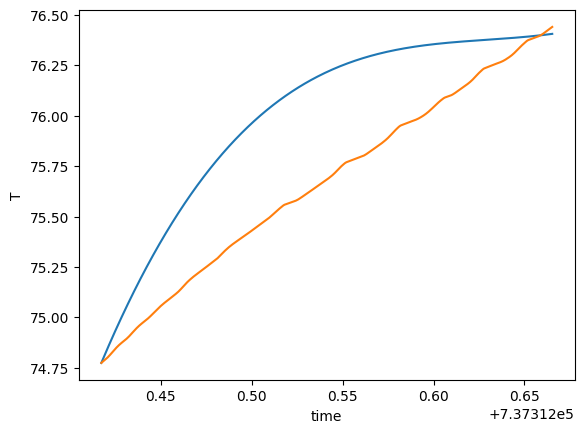

In [84]:
# Write your code here:

import matplotlib.pyplot as plt

T_est = np.zeros(len(TimeQuery)-1)
T_est[0] = InterpSpline_T[0]
p = bldgIdentification(InterpSpline_T, InterpSpline_u1, InterpSpline_u2)
p1, p2 = p[0], p[1]

for k in range(len(TimeQuery)-2):
  T_est[k+1] = (1 - p1 * InterpSpline_u1[k]) * T_est[k] + p2 * InterpSpline_u1[k] * InterpSpline_u2[k]


plt.plot(TimeQuery[:-1], InterpSpline_T[:-1], 'tab:blue')
plt.plot(TimeQuery[:-1], T_est, 'tab:orange')
plt.xlabel('time')
plt.ylabel('T')
plt.show()

### <font color=red> Deliverable 2c (5 pts): How well does the least squares approximation fit the data? Discuss.</font>

***

# <font color=blue> 3. Linear Classification:</font>
In this problem, a population $P$ (often people, but not necessary) refers to a collection of distinct objects, called its *members*.   Associated with each member $m_k$ is a
vector $v_k$ of values of known, delineated traits
of that member, called the member's $\textit{features}$.  The dimension of each feature vector is $n_F \times 1$.
Using this feature vector, each member of the population can
be represented as a point in $n_F$ dimensional space.  (Note that it is possible for two different members to have identical features and therefore be represented by the same point.)

Suppose the population $P$ is divided into two distinct groups, $G_1$ and $G_2$.
The goal of *linear classification* is to find a linear function, $~L(v) := c^T v + b$, such that
\begin{align}
c^T v_k + b  > 0 \ \  {\rm for \ all} \ v_k \in G_1
\end{align}
and
\begin{align}
c^T v_k + b  < 0 \ \  {\rm for \ all} \ v_k \in G_2
\end{align}

In other words, the linear inequalities $c^T v + b >0$ and $c^T v + b < 0$ split
the $n_F$-dimensional space into two nonintersecting halfspaces, and one group of the population lies entirely in one halfspace, while the other group lies in the other halfspace.  The linear function $L(v) := c^T v + b$ is said to *classify* the population into the two groups.  **Such a function can then be used as
a predictor for a new member $m_{k+1}$, attempting to predict which group it belongs to based on
the value of $L(v_{k+1})$.**

A concrete example will make the ideas clear.  
Suppose a population consisting of $n_P$ people who have just viewed a pre-release showing
of a new movie, called MovieX. The two groups consists of the people who liked (based on a short exit survey)
MovieX ($G_1$), and those people who did not like MovieX ($G_2$).
Suppose $n_F = 2$, and the traits (features) describing each member are 2-dimensional vectors

\begin{align}
v_k = \left[ \begin{array}{l}
{\rm age \ of \ m_k} \\
{\rm number \ of \ action \ movies \ seen \ by \ m_k \ this \ year} \end{array}
\right]
\end{align}


Using this data, the producers of MovieX want to build a linear classifier (based on *age*
and *number of action movies seen this year*) which will predict if a new person (outside of this original population set) will like the movie, so they can target their promotions accordingly. For example, if they discover that older viewers who don't see many action movies prefer MovieX, then they might do a pamphlet-handout to middle-aged people buying non-action movie tickets a week before MovieX is released.

The generalization is as follows:
Given two sets of points

\begin{align}
G_1 = (v_1,v_2,...,v_N), \quad
G_2 = (v_{N+1},v_{N+2}, ... v_{P})
\end{align}

where each $v_k \in {\bf R}^{n_F}$,
the task is to find a linear constraint that "separates" the two groups.  
Specifically, we want to find $c \in {\bf R}^{n_F}$ and $b \in {\bf R}$ such that

\begin{align}
c^T v_k + b > 0  \ {\rm for \ all} \  k \leq N
\end{align}

and

\begin{align}
c^T v_k + b < 0  \ {\rm for \ all} \  k > N.
\end{align}

Note that if this is possible, then simply by scaling $c$ and $b$, it follows that

\begin{align}
c^T v_k + b \geq 1  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -1  \ {\rm for \ all} \  k > N.
\end{align}

Realistically, there may be some outliers in the data so that the two sets $G_1$ and $G_2$ simply can not be cleanly separated by a hyperplane (i.e. there is some discrete overlap in the points).  Therefore, we will need to include a nonnegative slack variable, $t_k \geq 0$ to formulate the problem. We adjust the constraint to

\begin{align}
c^T v_k + b \geq 1-t_k  \ {\rm for \ all} \  k \leq N
\end{align}

and

\begin{align}
c^T v_k + b \leq -(1-t_k)  \ {\rm for \ all} \  k > N.
\end{align}

Note that ideally most points will not need this adjustment, so we will encourage the use of such $t_k$ to a minimum
by minimizing $\sum_{k=1}^P t_k$. This results in a linear program of the form

\begin{align}
\min_{c,b,t_1,\ldots,t_P} \ t_1+t_2+\cdots + t_P
\end{align}

subject to

\begin{align}
t_1 \geq 0, t_2 \geq 0 , \ldots , t_P \geq 0
\end{align}

and

\begin{align}
c^T v_k + b \geq 1-t_k  \ {\rm for \ all} \  k \leq N
\end{align}

and

\begin{align}
c^T v_k + b \leq -(1-t_k)  \ {\rm for \ all} \  k > N.
\end{align}



**Part (a)** Write a function $\texttt{buildLinClass}$, with function declaration line

`def buildLinClass(G1, G2):
    return c,b,t
`

The input arguments $G_1$ and $G_2$ are real-values arrays of dimension
$n_F \times p_1$ and $n_F \times p_2$, respectively.   Each column is a feature
vector of a particular person in that group.

The output arguments are a $n_F \times 1$ vector $c$ and a scalar value $b$, such
that the linear function $L(v) := c^T v + b$ approximately classifies the two groups,
with $L(v) >0$ for members of $G_1$ and $L(v) < 0$ for members in $G_2$.  
Of course, because of outliers, the classification is not necessarily exact, but the linear program minimization has minimized the total amount of slack variables used to create the separation.  The 3rd output argument is the vector of required corrections $t$,
and is of dimension $(p_1 + p_2) \times 1$.


### <font color=red> Deliverable 3a (15 pts): write your answer in the code cell below.</font>

In [1]:
import numpy as np
import scipy as cp
import cvxpy as cv
import cvxopt
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def buildLinClass(G1, G2):

  N = G1.shape[1]
  P = G1.shape[1] + G2.shape[1]

  c = np.concatenate([np.zeros(3), np.ones(P)])

  G_t = -np.hstack([np.zeros((P, 3)), np.eye(P)])

  G_c1 = G1.T
  G_b1 = np.ones((N, 1))
  G_t1 = np.eye(N, P)

  G_c2 = -G2.T
  G_b2 = -np.ones((P-N, 1))
  G_t2 = np.eye(P-N, P)

  G_1 = -np.hstack([G_c1, G_b1, G_t1])
  G_2 = -np.hstack([G_c2, G_b2, G_t2])
  G = np.vstack([G_t, G_1, G_2])

  h = np.concatenate([np.zeros(P), np.ones(P)]).T

  c = cvxopt.matrix(c, tc='d')
  G = cvxopt.matrix(G, tc='d')
  h = cvxopt.matrix(h, tc='d')

  sol = cvxopt.solvers.lp(c,G,h) # min c.T*x, s.t. Gx <= h
  xOpt = sol['x']
  J = sol['primal objective']

  # print('xOpt =', np.array(xOpt).ravel())
  # print('Cost =',J)
  # print('status =', sol['status'])

  c = np.array(xOpt).ravel()[:2]
  b = np.array(xOpt).ravel()[2]
  t = np.array(xOpt).ravel()[3:]

  return c,b,t

**Part (b)** You can try your function out on a synthetic dataset below (with no outliers). Note that in practice, the number of features is usually much larger than 2, and hence cannot be visualized.

### <font color=red> Deliverable 3b (2 pts): submit the plot resulting from running the code below.</font>

     pcost       dcost       gap    pres   dres   k/t
 0: -1.5348e+01 -1.7195e+02  7e+02  2e+00  1e+01  1e+00
 1:  3.6946e-01 -1.3693e+01  3e+01  2e-01  1e+00  2e+00
 2: -3.1103e-02 -3.7965e-01  7e-01  6e-03  3e-02  6e-02
 3: -3.1139e-04 -3.7854e-03  7e-03  6e-05  3e-04  6e-04
 4: -3.1138e-06 -3.7853e-05  7e-05  6e-07  3e-06  6e-06
 5: -3.1138e-08 -3.7853e-07  7e-07  6e-09  3e-08  6e-08
 6: -3.1138e-10 -3.7853e-09  7e-09  6e-11  3e-10  6e-10
Optimal solution found.


(-4.549253419423466,
 3.5976636519527707,
 -2.3123488569939945,
 2.273192674186004)

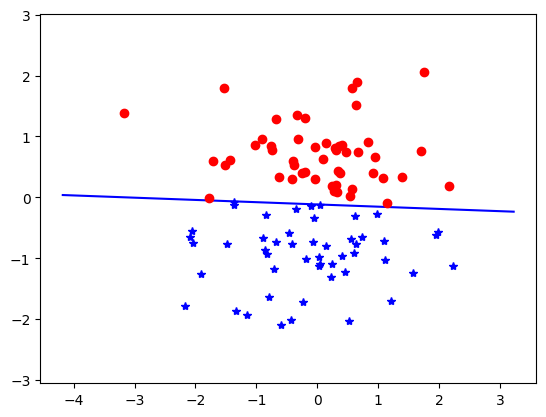

In [7]:
nF = 2
nP = 100
cTrue = np.random.randn(nF,1)
bTrue = np.random.randn(1,1)
Pop = np.random.randn(nF, nP)

LPop =  cTrue.T@Pop + bTrue
idx_pos = np.argwhere(LPop>0)
idx_neg = np.argwhere(LPop<0)

G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

cEst, bEst, tAdjust =  buildLinClass(G1,G2)

max(abs(tAdjust))      # should be 0 (or very close)
f1Min = np.min(Pop[0,:])  # minimum age
f1Max = np.max(Pop[0,:])  # maximum age
f2Min = np.min(Pop[1,:])  # minimum number of movies
f2Max = np.max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')

**Part c** We can add some random noise to 10\% of the data, so that outliers appear.   Now the classification will likely not be perfect,
but will still make good sense.  Run this several times to gain intuition.

### <font color=red> Deliverable 3c (3 pts): submit the plot resulting from running the code below.</font>

     pcost       dcost       gap    pres   dres   k/t
 0: -1.6576e+01 -1.8103e+02  7e+02  2e+00  1e+01  1e+00
 1:  9.1048e-01 -1.4247e+01  3e+01  2e-01  1e+00  2e+00
 2: -1.5466e-02 -5.6636e-01  1e+00  9e-03  5e-02  8e-02
 3: -1.5885e-04 -5.6398e-03  1e-02  9e-05  5e-04  8e-04
 4: -1.5884e-06 -5.6394e-05  1e-04  9e-07  5e-06  8e-06
 5: -1.5884e-08 -5.6394e-07  1e-06  9e-09  5e-08  8e-08
 6: -1.5884e-10 -5.6394e-09  1e-08  9e-11  5e-10  8e-10
Optimal solution found.


<ipython-input-11-c98b41f90a7a>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nOut = np.int(0.1*nP)
<ipython-input-11-c98b41f90a7a>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Noise = np.asarray([np.random.randn(1) if i < nOut else 0.0 for i in range(nP)])


(-3.6109837948487638,
 3.5193566392067375,
 -4.468471535198837,
 3.8690570070043977)

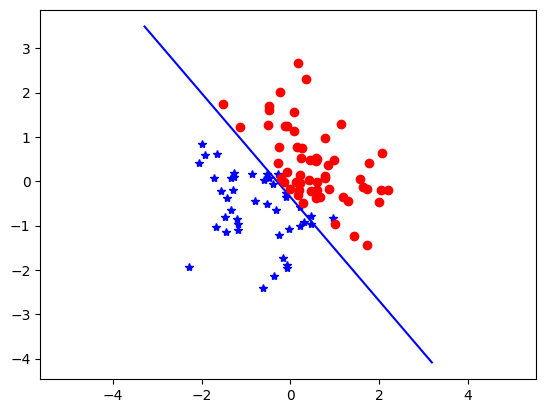

In [11]:
nF = 2
nP = 100
nOut = np.int(0.1*nP)
cTrue = np.random.randn(nF,1)
bTrue = np.random.randn(1,1)
Pop = np.random.randn(nF, nP)
Noise = np.asarray([np.random.randn(1) if i < nOut else 0.0 for i in range(nP)])

LPop =  cTrue.T@Pop + bTrue + Noise  #corrupt some L-values with noise
idx_pos = np.argwhere(LPop>0)
idx_neg = np.argwhere(LPop<0)

G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

[cEst, bEst, tAdjust] =  buildLinClass(G1,G2)

max(abs(tAdjust))      # likely nonzero, and > 1, dealing wiht non-separability
f1Min = min(Pop[0,:])  # minimum age
f1Max = max(Pop[0,:])  # maximum age
f2Min = min(Pop[1,:])  # minimum number of movies
f2Max = max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')

**Part (d)** Here we chose to minimize the 1-norm of the slack variables $t_k$. Conceptually, how would the classification change if we instead minimized the infinity-norm of the slack variables?

### <font color=red> Deliverable 3d (5 pts): submit your written answer in the PDF.</font>

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+02  8e+02  4e+00  1e+02  1e+00
 1:  1.2474e+00 -7.9405e+00  4e+01  4e-01  1e+01  2e+00
 2:  7.2549e-01 -7.1073e-01  3e+00  6e-02  2e+00  9e-03
 3:  1.1326e-01 -2.0936e-01  3e-01  1e-02  4e-01  5e-03
 4:  1.2518e-02 -2.3033e-02  3e-02  1e-03  4e-02  6e-04
 5:  1.7744e-04 -3.2687e-04  4e-04  2e-05  6e-04  8e-06
 6:  1.7740e-06 -3.2679e-06  4e-06  2e-07  6e-06  8e-08
 7:  1.7740e-08 -3.2679e-08  4e-08  2e-09  6e-08  8e-10
Optimal solution found.


(-3.6109837948487638, 3.5193566392067375, -5.043471906901072, 3.63506007033218)

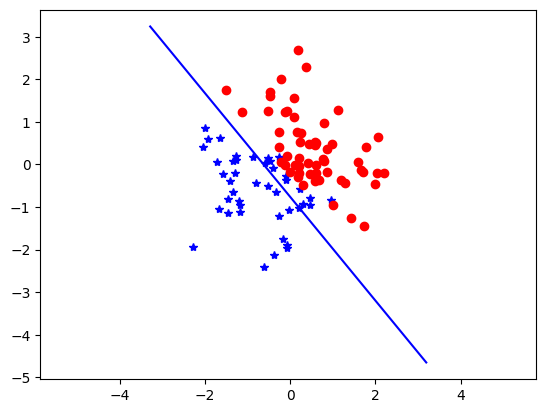

In [12]:
def buildLinClassInf(G1, G2):

  N = G1.shape[1]
  P = G1.shape[1] + G2.shape[1]

  c = np.concatenate([np.ones(2), np.zeros(P + 3)])

  G_t = -np.hstack([np.zeros((P, 5)), np.eye(P)]) # Done P x (P+5)

  G_c1 = G1.T
  G_b1 = np.ones((N, 1))
  G_t1 = np.eye(N, P)

  G_c2 = -G2.T
  G_b2 = -np.ones((P-N, 1))
  G_t2 = np.eye(P-N, P)

  G_1 = -np.hstack([np.zeros((N, 2)), G_c1, G_b1, G_t1]) # N x (P+5)
  G_2 = -np.hstack([np.zeros((P - N, 2)), G_c2, G_b2, G_t2]) # (P-N) x (P+5)

  G_T11 = np.hstack([-np.ones(N).reshape(N, 1), np.zeros(N).reshape(N, 1), np.zeros((N, 3)), np.eye(N, P)])
  G_T12 = np.hstack([-np.ones(N).reshape(N, 1), np.zeros(N).reshape(N, 1), np.zeros((N, 3)), -np.eye(N, P)])
  G_T1 = np.vstack([G_T11, G_T12]) # 2N x (P+5)

  G_T21 = np.hstack([np.zeros(P - N).reshape(P - N, 1), -np.ones(P - N).reshape(P - N, 1), np.zeros((P - N, 3)), np.eye(P - N, P)])
  G_T22 = np.hstack([np.zeros(P - N).reshape(P - N, 1), -np.ones(P - N).reshape(P - N, 1), np.zeros((P - N, 3)), -np.eye(P - N, P)])
  G_T2 = np.vstack([G_T21, G_T22]) # 2(P-N) x (P+5)

  G = np.vstack([G_T1, G_T2, G_t, G_1, G_2])

  h = np.concatenate([np.zeros(3 * P), np.ones(P)]).T

  c = cvxopt.matrix(c, tc='d')
  G = cvxopt.matrix(G, tc='d')
  h = cvxopt.matrix(h, tc='d')

  sol = cvxopt.solvers.lp(c,G,h) # min c.T*x, s.t. Gx <= h
  xOpt = sol['x']
  J = sol['primal objective']

  c = np.array(xOpt).ravel()[2:4]
  b = np.array(xOpt).ravel()[4]
  t = np.array(xOpt).ravel()[5:]

  return c,b,t

# nF = 2
# nP = 100
# cTrue = np.random.randn(nF,1)
# bTrue = np.random.randn(1,1)
# Pop = np.random.randn(nF, nP)

# LPop =  cTrue.T@Pop + bTrue
# idx_pos = np.argwhere(LPop>0)
# idx_neg = np.argwhere(LPop<0)

# G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
# G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

cEst, bEst, tAdjust = buildLinClassInf(G1, G2)

max(abs(tAdjust))      # should be 0 (or very close)
f1Min = np.min(Pop[0,:])  # minimum age
f1Max = np.max(Pop[0,:])  # maximum age
f2Min = np.min(Pop[1,:])  # minimum number of movies
f2Max = np.max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')



---



# <font color = blue> Question 4. KKT Conditions </font>

The following problems also include some of the examples from Homework 2. Write out the KKT conditions for each of the constrained problems.

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ &  -5z_1 -7z_2  \nonumber\\
\text{s.t. } & -3z_1 +2z_2 \leq 30  \nonumber\\
& -2z_1 + z_2 \leq 12  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber
\end{align}

### <font color=red> Deliverable 4a (5 pts): submit your written answer as part of your PDF. </font>

$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & 3z_1 + z_2  \\
\text{s.t. } & z_1 - z_2 \leq 1  \\
& 3z_1 + 2z_2 \leq 12  \\
& 2z_1 + 3z_2 \leq 3  \\
& -2z_1 +3z_2 \geq 9  \\
& z_1 \geq 0  \\
& z_2 \geq 0
\end{align}


### <font color=red> Deliverable 4b (5 pts): submit your written answer as part of your PDF.</font>

For this problem only (Part b), in addition to writing out the KKT conditions, verify whether Pyomo's answer satisfies the KKT conditions.

### <font color=red> Deliverable 4c (5 pts): submit your code as part of your PDF.</font>

In [4]:
# Install required dependencies
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !pip install -q pyomo
  !apt-get install -y -qq glpk-utils
  !apt-get install -y -qq coinor-cbc

In [6]:
# Write your code here:

import numpy as np
import pyomo
import pyomo.environ as pyo
from pyomo.opt import SolverStatus, TerminationCondition
threshold = 1e-5

model = pyo.ConcreteModel()

model.z1 = pyo.Var()
model.z2 = pyo.Var()

model.Obj = pyo.Objective(expr = 3 * model.z1 + model.z2)
model.Constraint1 = pyo.Constraint(expr = model.z1 - model.z2 - 1 <= 0)
model.Constraint2 = pyo.Constraint(expr = 3 * model.z1 + 2 * model.z2 - 12 <= 0)
model.Constraint3 = pyo.Constraint(expr = 2 * model.z1 + 3 * model.z2 - 3 <= 0)
model.Constraint4 = pyo.Constraint(expr = 2 * model.z1 - 3 * model.z2 + 9 <= 0)
model.Constraint5 = pyo.Constraint(expr = - model.z1 <= 0)
model.Constraint6 = pyo.Constraint(expr = - model.z2 <= 0)

model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

solver = pyo.SolverFactory('cbc')
results = solver.solve(model)

print('dual 1:', model.dual[model.Constraint1])
print('dual 2:', model.dual[model.Constraint2])
print('dual 3:', model.dual[model.Constraint3])
print('dual 4:', model.dual[model.Constraint4])
print('dual 5:', model.dual[model.Constraint5])
print('dual 6:', model.dual[model.Constraint6])

print('z1*_solver =', pyo.value(model.z1))
print('z2*_solver =', pyo.value(model.z2))

print('opt_value =', pyo.value(model.Obj))


if results.solver.termination_condition != TerminationCondition.optimal:
    KKTsat = False
else:
    A = -np.eye(2)
    b = -np.ones((2,))
    zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])

    u = []
    for c in model.component_objects(pyo.Constraint, active=True):
        print ("Constraint", c)
        for index in c:
            u.append(-model.dual[c[index]]) # The duals in pyomo are defined as -u<=0, so we add a negative sign.
            print(model.dual[c[index]])
    u = np.asarray(u)
    for i in range(len(u)):
        if (u[i] < threshold) & (u[i] > -threshold):
            u[i] = 0

    # Checking KKT Conditions:
    flag_primal = np.all(A@zOpt <= b + threshold)   #  A@zOpt <= b primal feasibility
    flag_dual = np.all(u >= 0)     # dual feasibility
    flag_cs = np.all(np.multiply(u,(A@zOpt-b)) < threshold) & np.all(np.multiply(u,(A@zOpt-b)) > -threshold)  # complementary slackness u1*g1 = 0, u2*g2=0
    grad_lagrangian = [2*zOpt[0],2*zOpt[1]] + u.T@A

    for i in range(len(grad_lagrangian)):
        if (grad_lagrangian[i] < threshold) & (grad_lagrangian[i] > -threshold):  # gradient of Lagragian evaluated at optimizer point must be zero.
            grad_lagrangian[i] = 0
    flag_grad = np.all(grad_lagrangian == 0)
    KKT_conditions = np.array([flag_primal, flag_dual, flag_cs, flag_grad])
    if all(KKT_conditions == 1):
        KKTsat = True
    else:
        KKTsat = False

print(KKTsat)

  - termination condition: infeasible
  - message from solver: <undefined>


KeyError: ignored

$\textbf{Part (d)}$

\begin{align}
\min_{z_1,z_2}~ & z_1^2 + z_2^2 \nonumber\\
\text{s.t. } & z_1 \leq -3 \nonumber\\
& z_2 \leq 4 \nonumber\\
& 0 \geq 4z_1+3z_2  \nonumber
\end{align}


### <font color=red> Deliverable 4d (5pts): submit your written answer as part of your PDF.</font>

# <font color=blue> Question 5. HW3 Summary/Wrapper </font>

Rate your confidence in your homework solutions and understanding of material.

A) I am very confident and feel great about this content.

B) I am somewhat confident.

C) I am not feeling confident.

Any additional comments? (Comments are optional, but please rate either A/B/C. All choices will receive the full 5 points.)

### <font color=red> Deliverable 5 (5 pts): Write your answer in your PDF submission or in a text cell here </font>